In [54]:
import numpy as np
import matplotlib.pyplot as plt
import ugradio as ug
import scipy.constants as consts

In [32]:
moon = np.load('big_moon270.npz')
times = moon['time']
volts = moon['volts']

<IPython.core.display.Javascript object>


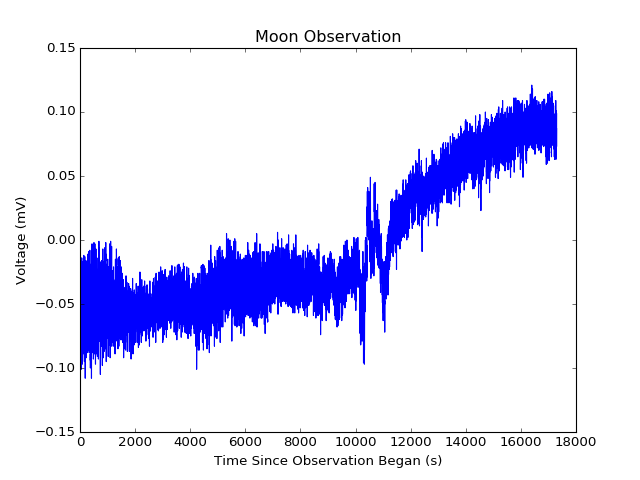

In [34]:
plt.plot(times - times[0], volts*1000)
plt.title('Moon Observation')
plt.xlabel('Time Since Observation Began (s)')
plt.ylabel('Voltage (mV)')
plt.show()

In [35]:
ftmoon = np.abs(np.fft.fft(volts))**2
freqs = np.fft.fftfreq(len(volts), 1)

<IPython.core.display.Javascript object>


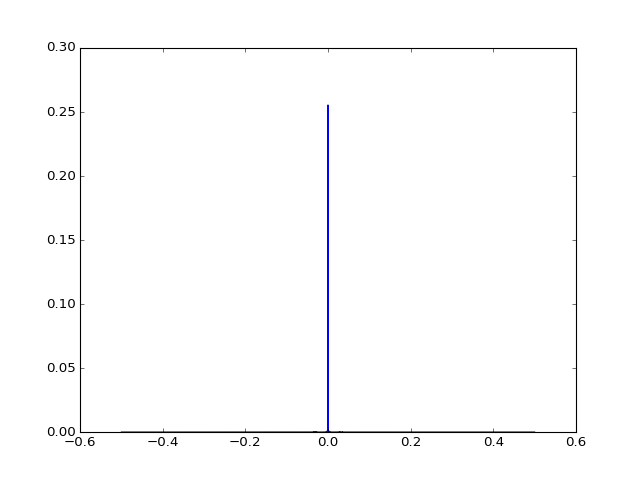

In [36]:
%matplotlib notebook
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(ftmoon))
plt.show()

## Big Moon Data

In [37]:
moon = np.load('big_moonfinal.npz')
times = moon['time']
volts = moon['volts']

<IPython.core.display.Javascript object>


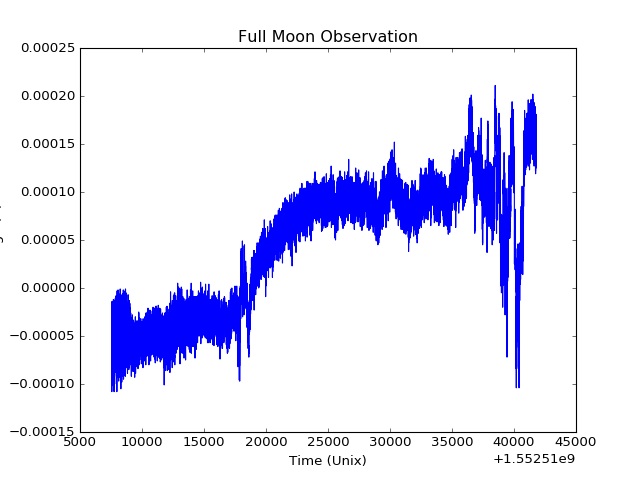

In [38]:
plt.plot(times, volts)
plt.xlabel('Time (Unix)')
plt.ylabel('Voltage (V)')
plt.title('Full Moon Observation')
plt.show()

In [39]:
moonvolts = np.fft.fft(volts)
ftmoon = np.abs(moonvolts)**2
freqs = np.fft.fftfreq(len(volts), 1)

<IPython.core.display.Javascript object>


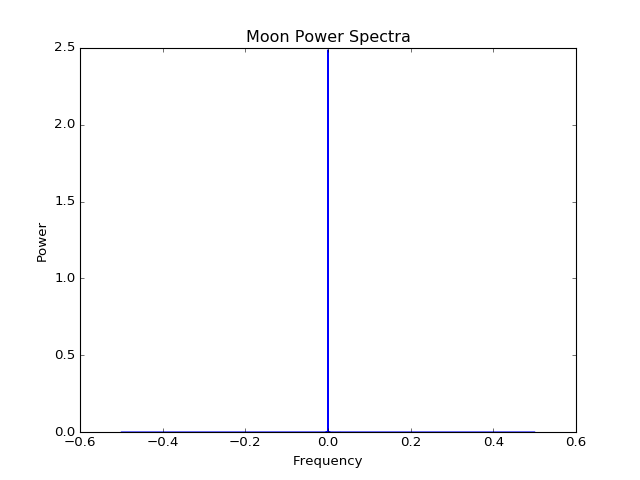

In [40]:
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(ftmoon))
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Moon Power Spectra')
plt.show()

### Filter out noise from moon voltages

In [41]:
moonvolts[np.where(np.abs(freqs) > 0.04)] = 0
moonvolts[np.where(np.abs(freqs) < 0.025)] = 0
ftmoon = np.abs(moonvolts)**2

### Plot the filtered Moon Power Spectra

<IPython.core.display.Javascript object>


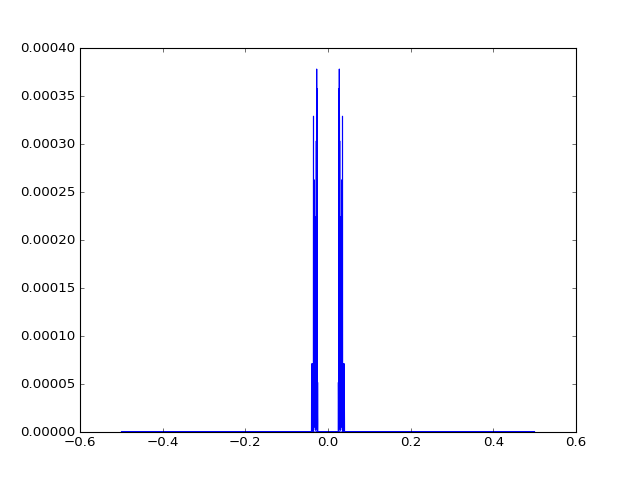

In [42]:
%matplotlib notebook
plt.plot(freqs, ftmoon)
plt.show()

### Inverse FT the filtered Voltage and Frequencies

In [43]:
invmoon = np.fft.ifft(moonvolts)

### Plot the Filtered times and Moon Voltages

<IPython.core.display.Javascript object>


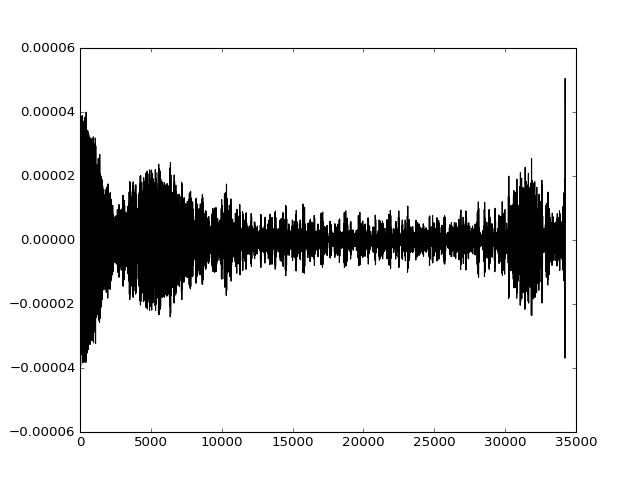

In [44]:
%matplotlib notebook
plt.plot(times-times[0], invmoon, 'k-')
plt.show()

In [45]:
np.where(invmoon == 0)

(array([], dtype=int64),)

In [46]:
finalmoon = np.fft.fft(invmoon)

<IPython.core.display.Javascript object>


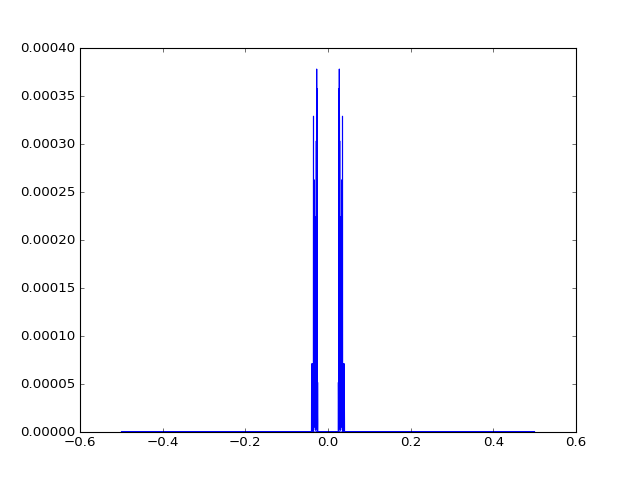

In [47]:
plt.plot(freqs, np.abs(finalmoon)**2)
plt.show()

### Bessel the MOON

In [48]:
# null values of data
xnmoon = np.array([2700, 9200])
# J1(x)/x nulls
xnbess = np.array([3.8317, 7.0156])

In [50]:
unixtime = times
JDtime = ug.timing.julian_date(unixtime)
LSTtime = ug.timing.lst(jd = JDtime)*180/np.pi #convert LSTtime from rad to deg # now DEG
JDtime

array([ 2458556.45320619,  2458556.45321729,  2458556.45322887, ...,
        2458556.84949044,  2458556.84950201,  2458556.84951359])

In [52]:
ra = ug.coord.moonpos(JDtime[0])[0]

In [55]:
h2 = LSTtime - ra #DEG
L = ug.coord.nch.lat*np.pi/180 #DEG to RAD
l = consts.c/10.7e9 #m
d = ug.coord.sunpos(JDtime[0])[1]*np.pi/180  #DEG to RAD

In [56]:
h = [] #DEG
for val in h2:
    if val < 0:
        h.append(val+360)
    else:
        h.append(val)

<IPython.core.display.Javascript object>


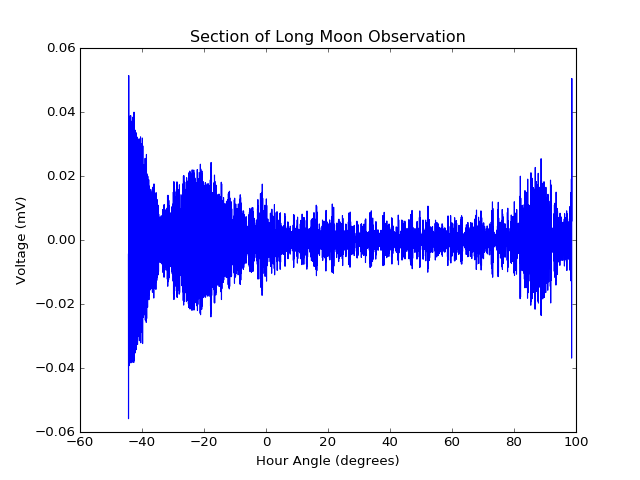

In [60]:
plt.plot(h2, invmoon*1000)
plt.title("Section of Long Moon Observation")
plt.ylabel("Voltage (mV)")
plt.xlabel("Hour Angle (degrees)")
plt.savefig("moonsectionall.png")
plt.show()